In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv(r'Datasets\tips.csv')

Test statitics W : 0.921815037727356
p-value  4.896873462278961e-10
Data is not normally distributed


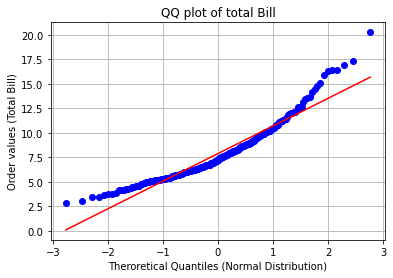

In [11]:
# total_bill_series=df['total_bill']
total_bill_series=df['price_per_person']
# nomallity test with shapiro wilk test
shapiro_test=stats.shapiro(total_bill_series)
print("Test statitics W :",shapiro_test.statistic)
print("p-value ", shapiro_test.pvalue)

alpha = 0.05 # common significane level
if shapiro_test.pvalue > alpha:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

# QQ plit
stats.probplot(total_bill_series,dist="norm",plot=plt)
plt.title('QQ plot of total Bill')
plt.xlabel('Theroretical Quantiles (Normal Distribution)')
plt.ylabel('Order values (Total Bill)')
plt.grid(True)
plt.show()

In [15]:
df=pd.read_csv(r'Datasets\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shapiro wilked p value   1.9867612763291298e-11
 The data likely does not follow a normal distribution


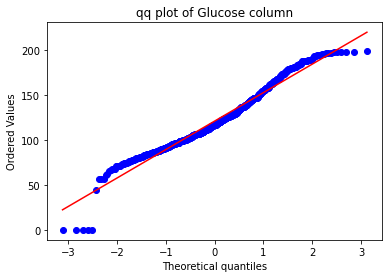

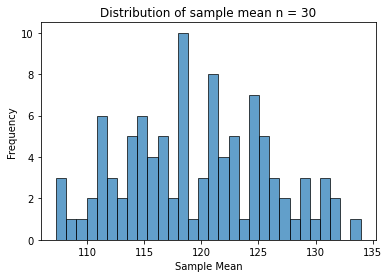

Shapiro wilk p value  0.2365494668483734
Data may be normally distributed


In [18]:
# shapiro test on Glucose column
shapiro_test=stats.shapiro(df['Glucose'])
print("Shapiro wilked p value  ",shapiro_test.pvalue)
if shapiro_test.pvalue < 0.05:
    print(" The data likely does not follow a normal distribution")
else:
    print("Data may be normally distributed")

# Genereate a qq plot for the original column
stats.probplot(df['Glucose'],dist="norm",plot=plt)
plt.title('qq plot of Glucose column')
plt.show()

# Central limit Theroem
sample_means=[]
n_sample=100
sample_size=30

for _ in range(n_sample):
    sample=df['Glucose'].sample(n=sample_size,replace=True)
    sample_means.append(sample.mean())

# plot the distibution of sample means
plt.hist(sample_means,bins=30,edgecolor='k',alpha=0.7)
plt.title('Distribution of sample mean n = 30')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

# perform the shapiro wilk test on the sample mean
shapiro_test = stats.shapiro(sample_means)
print('Shapiro wilk p value ',shapiro_test.pvalue)

# Interpret the results
if shapiro_test.pvalue < 0.05:
    print(" The data likely does not follow a normal distribution")
else:
    print("Data may be normally distributed")